In [1]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vedntmathur/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vedntmathur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
api_key = 'your api key'

In [3]:
channel_username = "Kurzgesagt – In a Nutshell"   


In [4]:
youtube = build(
    api_service_name, api_version, developerKey=api_key)


request = youtube.search().list(
    part="snippet",
    q=channel_username,
    type="channel",
    maxResults=1
)
response = request.execute()

channel_id = response["items"][0]["id"]["channelId"]
print("Channel ID:", channel_id)

NameError: name 'api_service_name' is not defined

In [5]:
channel_id = ['UCsXVk37bltHxD1rDPwtNM8Q']

In [6]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)


In [7]:
def get_channel_stats(youtube, channel_id):

    all_data =[]

    request = youtube.channels().list(
    part = "snippet,contentDetails,statistics",
    id=','.join(channel_id)
    )
    response = request.execute()

    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics'] ['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalViews': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
               }

        all_data.append(data)
    return(pd.DataFrame(all_data))



In [8]:
channel_stats =get_channel_stats(youtube, channel_id)

In [9]:
channel_stats

,channelName,subscribers,views,totalViews,playlistId
0,Kurzgesagt – In a Nutshell,23700000,3166099526,273,UUsXVk37bltHxD1rDPwtNM8Q


In [10]:
playlist_id = "UUsXVk37bltHxD1rDPwtNM8Q"

def get_all_video_id(youtube, playlist_id):
    video_id = []
    next_page_token = None  # Initialize token

    while True:
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId=playlist_id,
            maxResults=50,  # Fetch 50 videos per request (max allowed)
            pageToken=next_page_token  # Get the next page
        )
        response = request.execute()

        # Extract video IDs from the response
        for item in response.get('items', []):
            video_id.append(item['contentDetails']['videoId'])

        # Get the next page token, if available
        next_page_token = response.get('nextPageToken')

        # If there's no next page, break the loop
        if not next_page_token:
            break

    return video_id


In [11]:
video_id = get_all_video_id(youtube, playlist_id)

In [12]:
video_id

['FPZuklD9eRg',
 '5sVfTPaxRwk',
 'XQQkHLW8b3Y',
 'KmgRBiRMmAU',
 'dCiMUWw1BBc',
 'RLEvo3I5C6w',
 'UyUm3KEnZxE',
 'oR3Q7RntqEw',
 '0pyGPK3fG4U',
 'mCAm38dSD78',
 'Pkbhn8sIWuw',
 'vC9BeyIlcYo',
 '9zCH37330f8',
 'reSfF60-2S4',
 'BmUZ2wp1lM8',
 'ecIwfilIkTY',
 'cHEOsKddURQ',
 'qBRaI0ZeAf8',
 'E55uSCO5D2w',
 'bgo7rm5Maqg',
 'v6WMAD5wNKs',
 'tDStIeOWc40',
 'c1nYtX-NUsc',
 'VD6xJq8NguY',
 'oTx-GSF3cts',
 'SbvAaDN1bpE',
 'vSSkDos2hzo',
 'dIpttD7b8B4',
 '_kelDJFjhOo',
 '49ApsH6lzk0',
 'dBxxi5XAm3U',
 'W-x9d-nhal4',
 'cRZOUcpiOxY',
 'fa8k8IQ1_X0',
 'hX_acKX1G2Y',
 'xswF0mRay_8',
 '92Y7SCDgCLg',
 'n2sn4kkkGQM',
 'GFLb5h2O2Ww',
 '_z7DkeP5WNg',
 'fcIWyctZVTM',
 'UebSfjmQNvs',
 '3DFE8gZe9bA',
 'J8imlz6Lki8',
 'BLW4hCFwSXE',
 'itBBsQRv0EU',
 '71eUes30gwc',
 'i8wAjC69ZuY',
 '_rBPwu2uS-w',
 'W6-BGkuA2Gc',
 'OvKr6loCciE',
 'BNAgDOZCydY',
 'S-gRXjKUnVs',
 'L_JQOH1tEEA',
 'LFfFlYQfXh0',
 'DRjmRNsPl1M',
 'pjoQdz0nxf4',
 'cUD8Nt0JDlw',
 '8ILQMRr1-8M',
 'i981tDgvhPg',
 'Oj_OwYR9jGQ',
 'isdLel273rQ',
 'LrIRuq

In [13]:
len(video_id)

273

In [14]:
def get_video_details(youtube, video_id):
    all_video_info = []

    # Request video details for the first 5 videos
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=','.join(video_id[:15])  # Convert list to comma-separated string
    )
    response = request.execute()

    stats_to_keep = {
        'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
        'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount'],
        'contentDetails': ['duration', 'definition', 'caption']
    }

    for video in response.get('items', []):  # Ensure 'items' exists in response
        video_info = {'video_id': video['id']}

        for category, keys in stats_to_keep.items():
            for key in keys:
                try:
                    video_info[key] = video[category][key]
                except KeyError:
                    video_info[key] = None  # Assign None if key is missing

        all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)


In [15]:
video_df = get_video_details(youtube, video_id)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,FPZuklD9eRg,Kurzgesagt – In a Nutshell,How Radioactive Are Your Teeth? #shorts,Your teeth might still carry the legacy of nuc...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-03-06T15:00:30Z,617231,59018,0,1066,PT2M15S,hd,false
1,5sVfTPaxRwk,Kurzgesagt – In a Nutshell,If You Eat Meat You Should Know This,Are you getting the full story? Go to https://...,None,2025-02-25T15:00:01Z,3011128,174603,0,21204,PT15M30S,hd,true
2,XQQkHLW8b3Y,Kurzgesagt – In a Nutshell,How to Clean Up Space Debris #shorts,"So, which one of these handy gadgets are you g...",None,2025-02-20T15:00:44Z,375530,30782,0,467,PT54S,hd,false
3,KmgRBiRMmAU,Kurzgesagt – In a Nutshell,What Falling in Love Does to You #shorts,Being in love impacts your brain and body sign...,None,2025-02-14T15:00:23Z,543915,57234,0,1420,PT53S,hd,false
4,dCiMUWw1BBc,Kurzgesagt – In a Nutshell,What Actual Aliens Might Look Like,Go to https://brilliant.org/nutshell/ to dive ...,None,2025-02-04T15:00:01Z,5386266,201889,0,7742,PT15M53S,hd,true
5,RLEvo3I5C6w,Kurzgesagt – In a Nutshell,How Chicken Heads Stopped Rabies #shorts,Imagine solving a rabies outbreak with chicken...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-30T15:00:35Z,2255701,192600,0,1047,PT1M35S,hd,false
6,UyUm3KEnZxE,Kurzgesagt – In a Nutshell,Are You a Machine? #shorts,Would you pass the Turing Test and prove you a...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-23T15:00:40Z,1796525,194439,0,2847,PT2M10S,hd,false
7,oR3Q7RntqEw,Kurzgesagt – In a Nutshell,Whales Evolved from This Animal #shorts,Did you know whales evolved from dog-sized lan...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-16T15:01:09Z,2367464,208153,0,4152,PT2M31S,hd,false
8,0pyGPK3fG4U,Kurzgesagt – In a Nutshell,Your Brain Deletes Your Childhood Memories #sh...,Ever wonder why you can’t recall memories from...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-09T15:00:02Z,1251226,86552,0,1475,PT1M2S,hd,false
9,mCAm38dSD78,Kurzgesagt – In a Nutshell,Lightning: Nature’s Plasma Highway #shorts,Lightning is like a super hero movie. The best...,None,2025-01-02T15:00:56Z,1362651,122273,0,1706,PT1M,hd,false


In [16]:
def get_comments_in_videos(youtube, video_ids, max_comments=100):
    all_comments = []

    for video_id in video_ids:
        next_page_token = None
        comments_fetched = 0  # Track comments per video

        while True:
            request = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                maxResults=100,  # Max comments per request
                pageToken=next_page_token
            )
            response = request.execute()

            for item in response.get('items', []):
                comment = item['snippet']['topLevelComment']['snippet']
                all_comments.append({
                    'video_id': video_id,
                    'comment_id': item['id'],
                    'author': comment.get('authorDisplayName', 'Unknown'),
                    'text': comment.get('textDisplay', ''),
                    'likes': comment.get('likeCount', 0),
                    'published_at': comment.get('publishedAt', ''),
                })
                comments_fetched += 1

                # Stop if max_comments per video is reached
                if max_comments and comments_fetched >= max_comments:
                    break

            # Get nextPageToken, if available
            next_page_token = response.get('nextPageToken')

            # Stop fetching more comments if:
            # - No more pages
            # - Reached max_comments limit
            if not next_page_token or (max_comments and comments_fetched >= max_comments):
                break

    return pd.DataFrame(all_comments)


In [17]:
comments_df = get_comments_in_videos(youtube, video_id)
comments_df

,video_id,comment_id,author,text,likes,published_at
0,FPZuklD9eRg,UgwZMTOVk5eSHBNMmO14AaABAg,@planktonfun1,Glow in the dark stickers are surprisingly car...,0,2025-03-10T07:23:59Z
1,FPZuklD9eRg,UgyMU6K_llQlao4EIkJ4AaABAg,@gravitrax3287,Nuka Cola😂,0,2025-03-10T06:56:16Z
2,FPZuklD9eRg,UgxCduL2Cunrz6KnSfl4AaABAg,@mas_yaris,"or, if you extremely lucky, you can have cool ...",0,2025-03-10T06:50:43Z
3,FPZuklD9eRg,Ugxk8zwiVYaHMyF4lwh4AaABAg,@zhenhuali4769,I don’t drink milk😃😃😃,0,2025-03-10T06:37:26Z
4,FPZuklD9eRg,UgyPWzQZ3cRzWpbeeDN4AaABAg,@InsiyaAbdullah,Bro said all of this calmly I’m freaking out r...,1,2025-03-10T06:18:26Z
...,...,...,...,...,...,...
27196,hOfRN0KihOU,Ugy6ESURxR7xiZgxgMh4AaABAg,@leningras9727,What the hell is happening with the comments s...,6,2024-12-27T13:58:46Z
27197,hOfRN0KihOU,Ugw1DXYa7jox6_s0idx4AaABAg,@NeptuneTraveler,"<a href=""https://www.youtube.com/watch?v=hOfRN...",1,2024-12-26T21:00:43Z
27198,hOfRN0KihOU,UgzcVsI2SgciURlxTox4AaABAg,@johnaugsburger6192,Thanks,0,2024-12-25T17:38:04Z
27199,hOfRN0KihOU,UgxSTAGzHABaZYPJOIl4AaABAg,@charaf-yt6492,As someone who is studying a bachelor&#39;s de...,1,2024-12-24T14:01:57Z


In [18]:
print(comments_df.columns)

Index(['video_id', 'comment_id', 'author', 'text', 'likes', 'published_at'], dtype='object')


In [19]:
comments_df['text'][5]

'Man, we almost got a whole generation of hulk like humans'

In [20]:
#feature engineering

video_df.isnull().any()

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
viewCount        False
likeCount        False
favoriteCount    False
commentCount     False
duration         False
definition       False
caption          False
dtype: bool

In [21]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
duration         object
definition       object
caption          object
dtype: object

In [22]:
numeric_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [23]:
#publish day in the week 
from dateutil import parser
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publisheDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime('%A'))

In [24]:
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))

In [25]:
video_df[['durationSecs', 'duration']]

,durationSecs,duration
0,0 days 00:02:15,PT2M15S
1,0 days 00:15:30,PT15M30S
2,0 days 00:00:54,PT54S
3,0 days 00:00:53,PT53S
4,0 days 00:15:53,PT15M53S
5,0 days 00:01:35,PT1M35S
6,0 days 00:02:10,PT2M10S
7,0 days 00:02:31,PT2M31S
8,0 days 00:01:02,PT1M2S
9,0 days 00:01:00,PT1M


In [26]:
#adding tag count 
video_df['tagCount']= video_df['tags'].apply(lambda x: 0 if x is None else len(x))

In [27]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,publisheDayName,durationSecs,tagCount
0,FPZuklD9eRg,Kurzgesagt – In a Nutshell,How Radioactive Are Your Teeth? #shorts,Your teeth might still carry the legacy of nuc...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-03-06 15:00:30+00:00,617231,59018,0,1066,PT2M15S,hd,false,Thursday,0 days 00:02:15,12
1,5sVfTPaxRwk,Kurzgesagt – In a Nutshell,If You Eat Meat You Should Know This,Are you getting the full story? Go to https://...,None,2025-02-25 15:00:01+00:00,3011128,174603,0,21204,PT15M30S,hd,true,Tuesday,0 days 00:15:30,0
2,XQQkHLW8b3Y,Kurzgesagt – In a Nutshell,How to Clean Up Space Debris #shorts,"So, which one of these handy gadgets are you g...",None,2025-02-20 15:00:44+00:00,375530,30782,0,467,PT54S,hd,false,Thursday,0 days 00:00:54,0
3,KmgRBiRMmAU,Kurzgesagt – In a Nutshell,What Falling in Love Does to You #shorts,Being in love impacts your brain and body sign...,None,2025-02-14 15:00:23+00:00,543915,57234,0,1420,PT53S,hd,false,Friday,0 days 00:00:53,0
4,dCiMUWw1BBc,Kurzgesagt – In a Nutshell,What Actual Aliens Might Look Like,Go to https://brilliant.org/nutshell/ to dive ...,None,2025-02-04 15:00:01+00:00,5386266,201889,0,7742,PT15M53S,hd,true,Tuesday,0 days 00:15:53,0
5,RLEvo3I5C6w,Kurzgesagt – In a Nutshell,How Chicken Heads Stopped Rabies #shorts,Imagine solving a rabies outbreak with chicken...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-30 15:00:35+00:00,2255701,192600,0,1047,PT1M35S,hd,false,Thursday,0 days 00:01:35,12
6,UyUm3KEnZxE,Kurzgesagt – In a Nutshell,Are You a Machine? #shorts,Would you pass the Turing Test and prove you a...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-23 15:00:40+00:00,1796525,194439,0,2847,PT2M10S,hd,false,Thursday,0 days 00:02:10,12
7,oR3Q7RntqEw,Kurzgesagt – In a Nutshell,Whales Evolved from This Animal #shorts,Did you know whales evolved from dog-sized lan...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-16 15:01:09+00:00,2367464,208153,0,4152,PT2M31S,hd,false,Thursday,0 days 00:02:31,12
8,0pyGPK3fG4U,Kurzgesagt – In a Nutshell,Your Brain Deletes Your Childhood Memories #sh...,Ever wonder why you can’t recall memories from...,"[inanutshell, kurzgesagt, kurzgesagt_inanutshe...",2025-01-09 15:00:02+00:00,1251226,86552,0,1475,PT1M2S,hd,false,Thursday,0 days 00:01:02,12
9,mCAm38dSD78,Kurzgesagt – In a Nutshell,Lightning: Nature’s Plasma Highway #shorts,Lightning is like a super hero movie. The best...,None,2025-01-02 15:00:56+00:00,1362651,122273,0,1706,PT1M,hd,false,Thursday,0 days 00:01:00,0


/var/folders/5v/c2g9nc_91td5tfpqh2tn2bhc0000gn/T/ipykernel_2061/3121066627.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot =ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


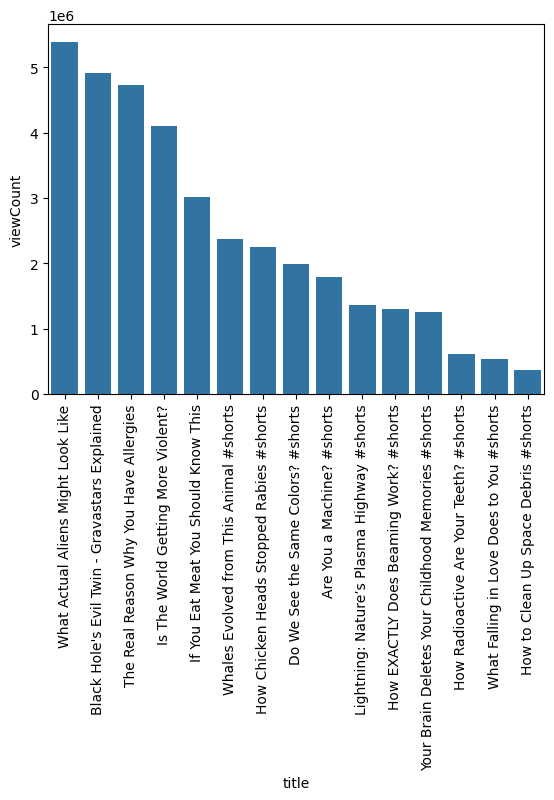

In [28]:
#Exploratory data analysis
#1 best performing videos

ax = sns.barplot(x='title', y='viewCount', data = video_df.sort_values('viewCount', ascending=False))
plot =ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

/var/folders/5v/c2g9nc_91td5tfpqh2tn2bhc0000gn/T/ipykernel_2061/2289886253.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot =ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


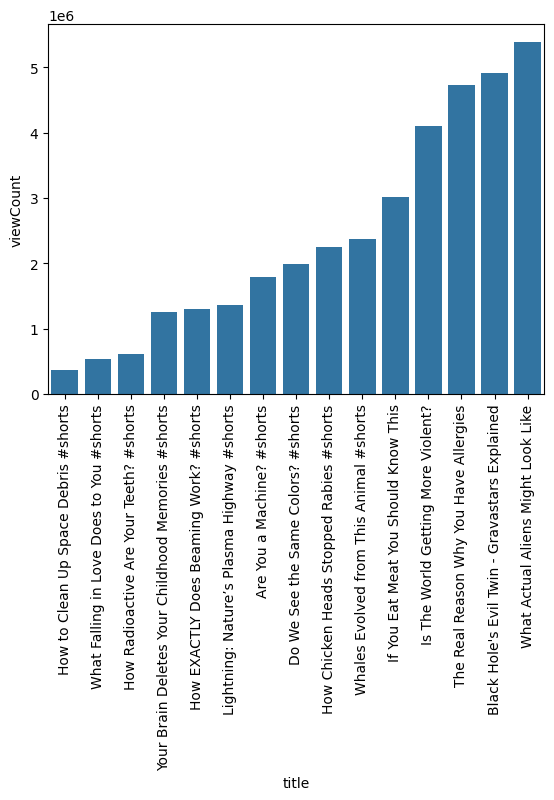

In [29]:
#2 worst performing videos

ax = sns.barplot(x='title', y='viewCount', data = video_df.sort_values('viewCount', ascending=True))
plot =ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

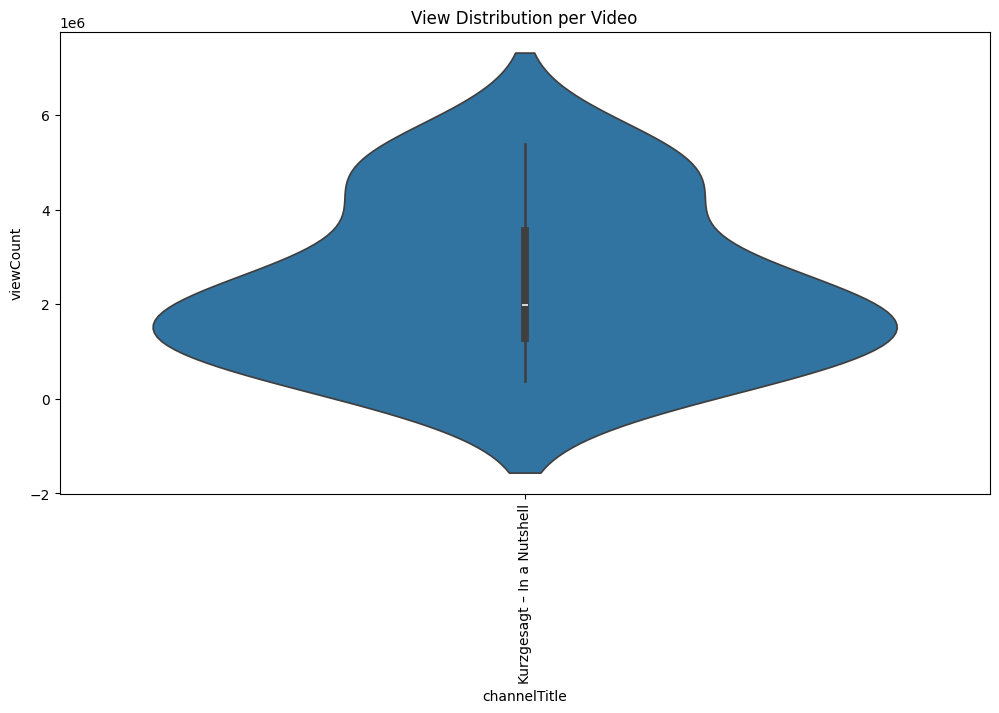

In [30]:
#3 View distribution per video

plt.figure(figsize=(12, 6))  # Optional: Adjust figure size
sns.violinplot(x=video_df['channelTitle'], y=video_df['viewCount'])

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title("View Distribution per Video")
plt.show()

#interpretation the channel views are quite distributed from 2M to above 6M views but most of the views the chanel get is arond 2M - 4M for the for the 15 videos in the df

<Axes: xlabel='likeCount', ylabel='viewCount'>

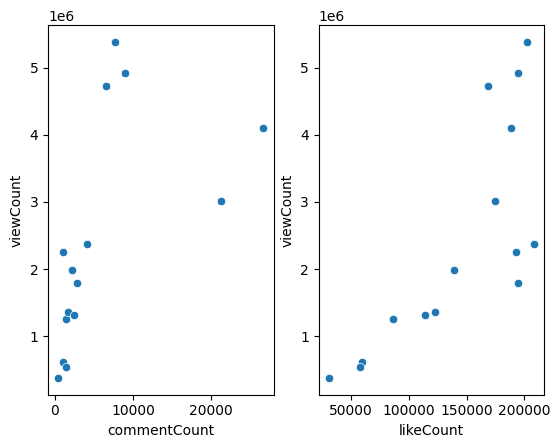

In [31]:
#4 views vs likes and comments

fig, ax = plt.subplots(1,2)
sns.scatterplot(data=video_df, x = 'commentCount', y = 'viewCount', ax=ax[0])
sns.scatterplot(data=video_df, x = 'likeCount', y = 'viewCount', ax=ax[1])


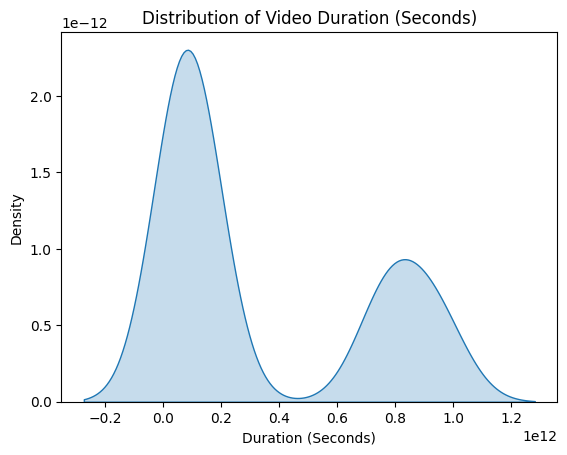

In [32]:
#avg video duration

video_df['durationSecs'] = pd.to_numeric(video_df['durationSecs'], errors='coerce')  # Convert to float
sns.kdeplot(data=video_df, x='durationSecs', fill=True, bw_adjust=0.5)

plt.title("Distribution of Video Duration (Seconds)")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Density")
plt.show()

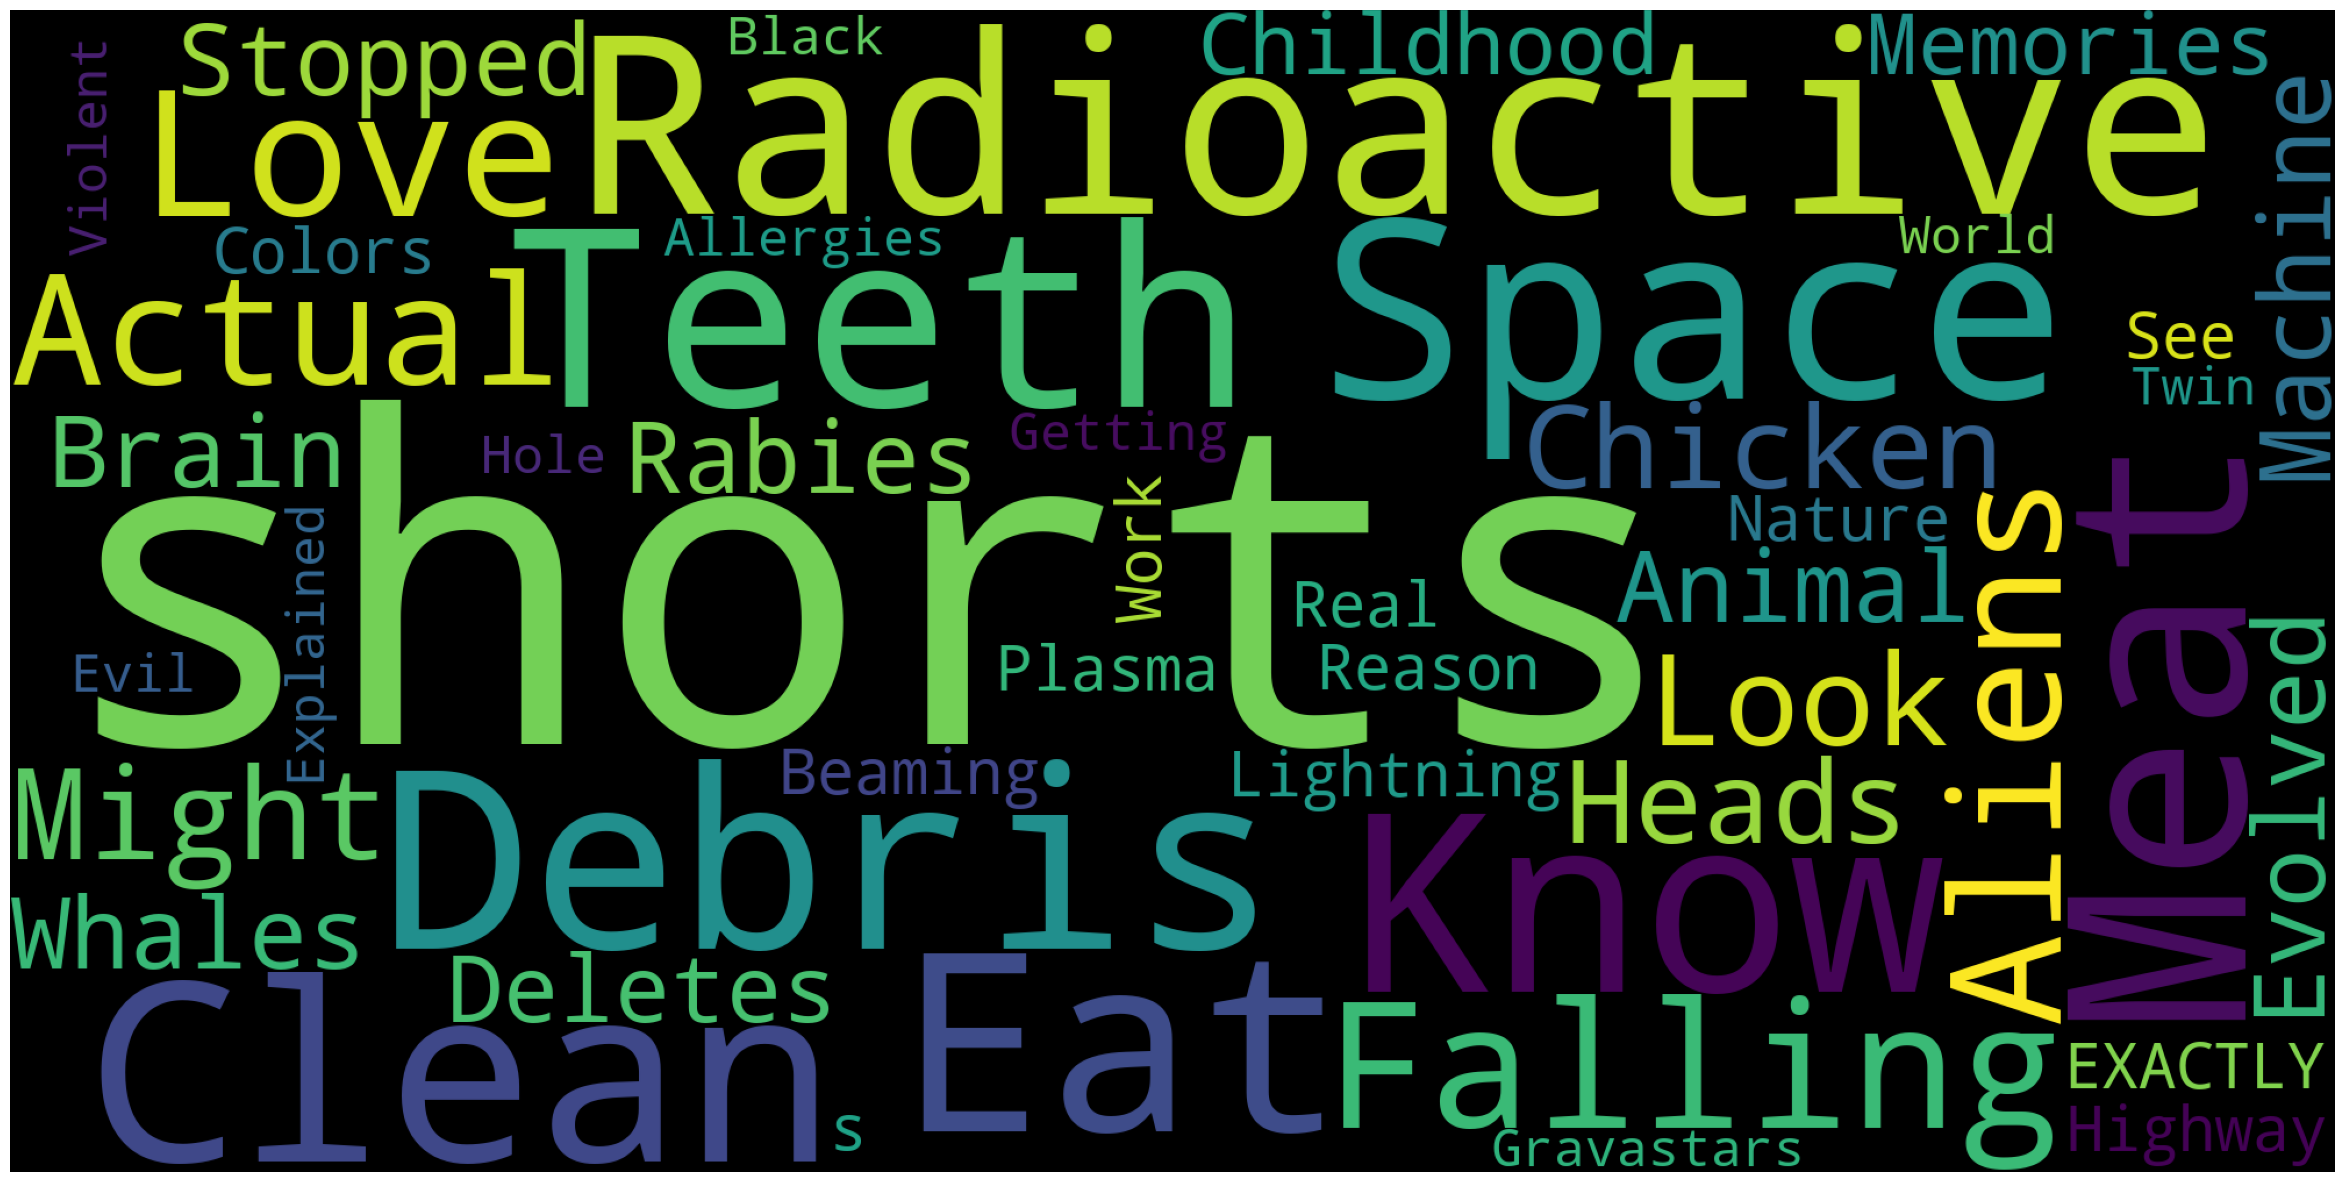

In [33]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

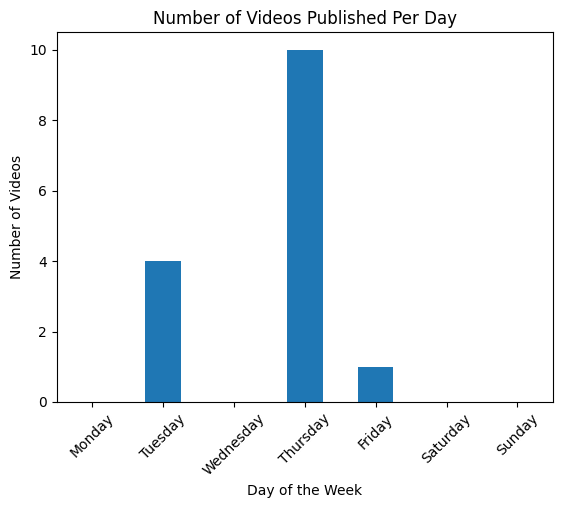

In [35]:
#5 upload schedule

video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])
video_df['weekday'] = video_df['publishedAt'].dt.day_name()

# Count occurrences per weekday
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = video_df['weekday'].value_counts().reindex(weekdays, fill_value=0)

# Convert to DataFrame
day_df = day_df.rename_axis('Day').reset_index()
day_df.columns = ['Day', 'Count']  

# Plot
ax = day_df.plot.bar(x='Day', y='Count', rot=45, legend=False)  
plt.title("Number of Videos Published Per Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Videos")
plt.show()